## **DEPARTMENT OF COMPUTER SCIENCE AND TECHNOLOGY**

### **Artificial Intelligence Lab (CS4271)**
### **Name: SAGAR BASAK**
### **Enrollment No: 2021CSB008**
### **Assignment: 4**

## **Question 1**

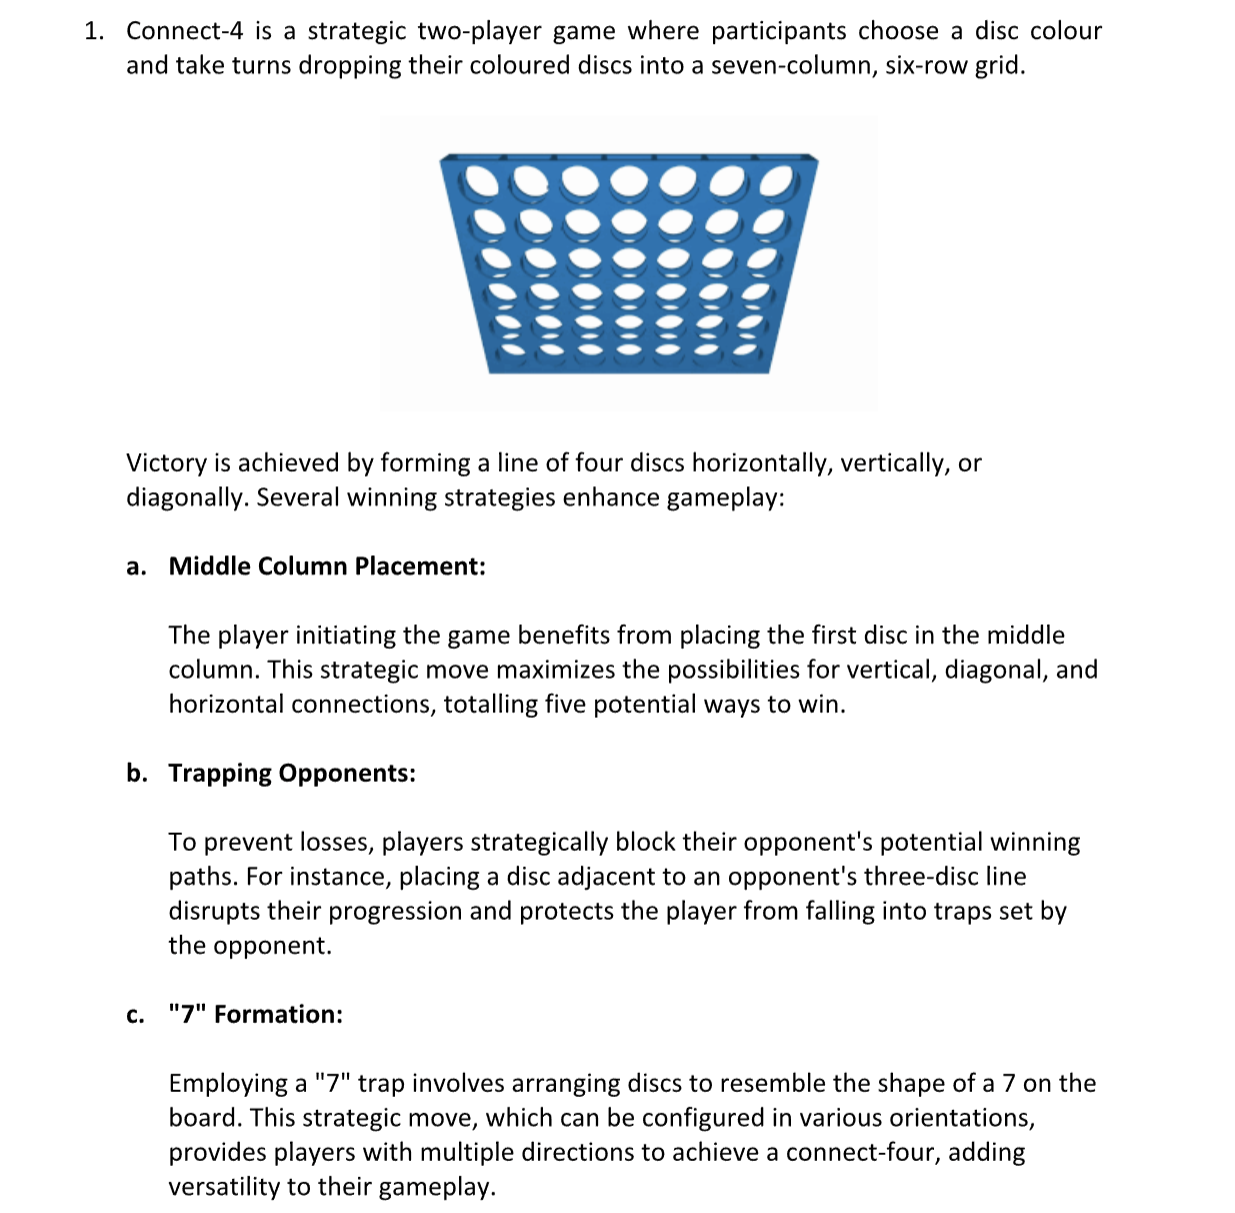

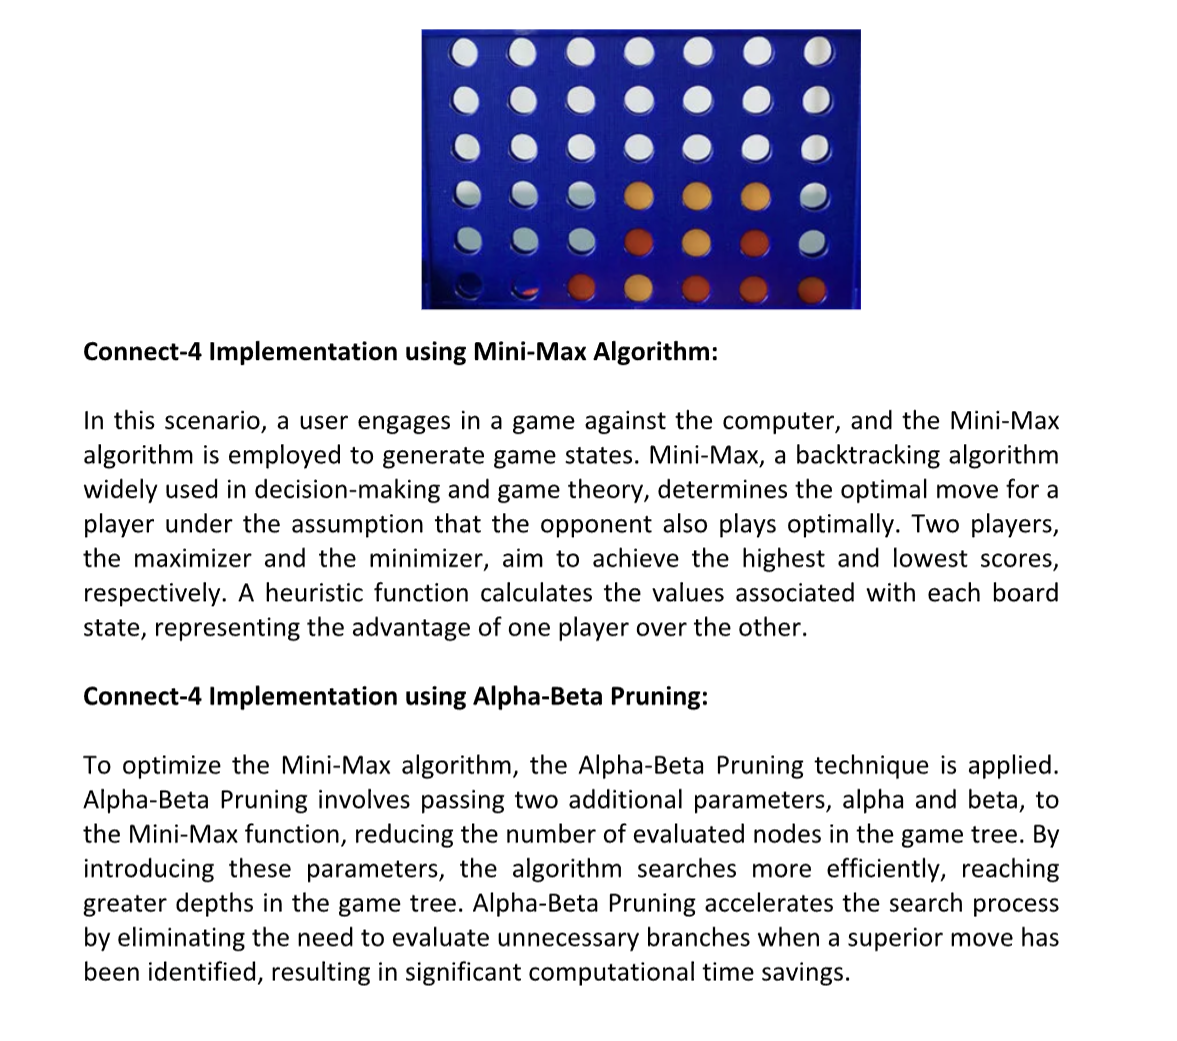

# **MINI-MAX with Alpha Beta Pruning**

In [2]:
import numpy as np
import random
import sys
import time

ROW_COUNT = 6
COLUMN_COUNT = 7
PLAYER = 1
AI = 2
WINDOW_LENGTH = 4

def create_board():
    return np.zeros((ROW_COUNT, COLUMN_COUNT), dtype=int)

def drop_piece(board, row, col, piece):
    board[row][col] = piece

def is_valid_location(board, col):
    return board[ROW_COUNT - 1][col] == 0

def get_next_open_row(board, col):
    for r in range(ROW_COUNT):
        if board[r][col] == 0:
            return r

def winning_move(board, piece):
    for c in range(COLUMN_COUNT - 3):
        for r in range(ROW_COUNT):
            if all(board[r, c + i] == piece for i in range(WINDOW_LENGTH)):
                return True
    for c in range(COLUMN_COUNT):
        for r in range(ROW_COUNT - 3):
            if all(board[r + i, c] == piece for i in range(WINDOW_LENGTH)):
                return True
    for c in range(COLUMN_COUNT - 3):
        for r in range(ROW_COUNT - 3):
            if all(board[r + i, c + i] == piece for i in range(WINDOW_LENGTH)):
                return True
    for c in range(COLUMN_COUNT - 3):
        for r in range(3, ROW_COUNT):
            if all(board[r - i, c + i] == piece for i in range(WINDOW_LENGTH)):
                return True
    return False

def score_position(board, piece):
    score = 0
    center_array = [board[r][COLUMN_COUNT//2] for r in range(ROW_COUNT)]
    score += center_array.count(piece) * 3
    for r in range(ROW_COUNT):
        row_array = [board[r][c] for c in range(COLUMN_COUNT)]
        score += evaluate_window(row_array, piece)
    for c in range(COLUMN_COUNT):
        col_array = [board[r][c] for r in range(ROW_COUNT)]
        score += evaluate_window(col_array, piece)
    for r in range(ROW_COUNT - 3):
        for c in range(COLUMN_COUNT - 3):
            diag_array = [board[r + i][c + i] for i in range(WINDOW_LENGTH)]
            score += evaluate_window(diag_array, piece)
    for r in range(ROW_COUNT - 3):
        for c in range(COLUMN_COUNT - 3):
            diag_array = [board[r + 3 - i][c + i] for i in range(WINDOW_LENGTH)]
            score += evaluate_window(diag_array, piece)
    return score

def evaluate_window(window, piece):
    score = 0
    opp_piece = PLAYER if piece == AI else AI
    if window.count(piece) == 4:
        score += 100
    elif window.count(piece) == 3 and window.count(0) == 1:
        score += 5
    elif window.count(piece) == 2 and window.count(0) == 2:
        score += 2
    if window.count(opp_piece) == 3 and window.count(0) == 1:
        score -= 4
    return score

def minimax(board, depth, alpha, beta, maximizingPlayer):
    valid_locations = [c for c in range(COLUMN_COUNT) if is_valid_location(board, c)]
    is_terminal = winning_move(board, PLAYER) or winning_move(board, AI) or len(valid_locations) == 0
    if depth == 0 or is_terminal:
        if winning_move(board, AI):
            return (None, 1000000)
        elif winning_move(board, PLAYER):
            return (None, -1000000)
        elif len(valid_locations) == 0:
            return (None, 0)
        else:
            return (None, score_position(board, AI))
    if maximizingPlayer:
        value, column = -sys.maxsize, random.choice(valid_locations)
        for col in valid_locations:
            row = get_next_open_row(board, col)
            temp_board = board.copy()
            drop_piece(temp_board, row, col, AI)
            new_score = minimax(temp_board, depth-1, alpha, beta, False)[1]
            if new_score > value:
                value, column = new_score, col
            alpha = max(alpha, value)
            if alpha >= beta:
                break
        return column, value
    else:
        value, column = sys.maxsize, random.choice(valid_locations)
        for col in valid_locations:
            row = get_next_open_row(board, col)
            temp_board = board.copy()
            drop_piece(temp_board, row, col, PLAYER)
            new_score = minimax(temp_board, depth-1, alpha, beta, True)[1]
            if new_score < value:
                value, column = new_score, col
            beta = min(beta, value)
            if alpha >= beta:
                break
        return column, value

def print_board(board):
    print(np.flip(board, 0))

def play_game():
    board = create_board()
    game_over = False
    turn = random.randint(0, 1)
    print_board(board)
    while not game_over:
        if turn == 0:
            col = int(input("Enter column (0-6): "))
            if is_valid_location(board, col):
                row = get_next_open_row(board, col)
                drop_piece(board, row, col, PLAYER)
                if winning_move(board, PLAYER):
                    print("Player wins!")
                    game_over = True
        else:
            start_time = time.time()
            col, _ = minimax(board, 5, -sys.maxsize, sys.maxsize, True)
            end_time = time.time()
            if is_valid_location(board, col):
                row = get_next_open_row(board, col)
                print("AI drops in column ", col)
                drop_piece(board, row, col, AI)
                if winning_move(board, AI):
                    print("AI wins!")
                    game_over = True
                print(f"Time taken for AI move: {end_time - start_time:.6f} seconds")
        print_board(board)
        if not game_over and all(board[ROW_COUNT-1][c] != 0 for c in range(COLUMN_COUNT)):
            print("Game is a Tie!")
            game_over = True
        turn ^= 1

if __name__ == "__main__":
    play_game()

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
Enter column (0-6): 2
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]]
AI drops in column  3
Time taken for AI move: 1.323855 seconds
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 2 0 0 0]]
Enter column (0-6): 2
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 2 0 0 0]]
AI drops in column  2
Time taken for AI move: 0.906718 seconds
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 2 0 0 0]]
Enter column (0-6): 3
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 1 1 0 0 0]
 [0 0 1 2 0 0 0]]
AI drops in column  1
Time taken for AI move: 0.706996 seconds
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 1 1 0 0 0]
 [0 2 1 2 0 0 0]]
Enter column (0-6): 4
[[

# **MINI-MAX without Alpha Beta Pruning**

In [3]:
import numpy as np
import random
import sys
import time

ROW_COUNT = 6
COLUMN_COUNT = 7
PLAYER = 1
AI = 2
WINDOW_LENGTH = 4

def create_board():
    return np.zeros((ROW_COUNT, COLUMN_COUNT), dtype=int)

def drop_piece(board, row, col, piece):
    board[row][col] = piece

def is_valid_location(board, col):
    return board[ROW_COUNT - 1][col] == 0

def get_next_open_row(board, col):
    for r in range(ROW_COUNT):
        if board[r][col] == 0:
            return r

def winning_move(board, piece):
    for c in range(COLUMN_COUNT - 3):
        for r in range(ROW_COUNT):
            if all(board[r, c + i] == piece for i in range(WINDOW_LENGTH)):
                return True
    for c in range(COLUMN_COUNT):
        for r in range(ROW_COUNT - 3):
            if all(board[r + i, c] == piece for i in range(WINDOW_LENGTH)):
                return True
    for c in range(COLUMN_COUNT - 3):
        for r in range(ROW_COUNT - 3):
            if all(board[r + i, c + i] == piece for i in range(WINDOW_LENGTH)):
                return True
    for c in range(COLUMN_COUNT - 3):
        for r in range(3, ROW_COUNT):
            if all(board[r - i, c + i] == piece for i in range(WINDOW_LENGTH)):
                return True
    return False

def minimax_no_pruning(board, depth, maximizingPlayer):
    valid_locations = [c for c in range(COLUMN_COUNT) if is_valid_location(board, c)]
    is_terminal = winning_move(board, PLAYER) or winning_move(board, AI) or len(valid_locations) == 0
    if depth == 0 or is_terminal:
        if winning_move(board, AI):
            return (None, 1000000)
        elif winning_move(board, PLAYER):
            return (None, -1000000)
        elif len(valid_locations) == 0:
            return (None, 0)
        else:
            return (None, score_position(board, AI))
    if maximizingPlayer:
        value = -sys.maxsize
        column = random.choice(valid_locations)
        for col in valid_locations:
            row = get_next_open_row(board, col)
            temp_board = board.copy()
            drop_piece(temp_board, row, col, AI)
            new_score = minimax_no_pruning(temp_board, depth-1, False)[1]
            if new_score > value:
                value = new_score
                column = col
        return column, value
    else:
        value = sys.maxsize
        column = random.choice(valid_locations)
        for col in valid_locations:
            row = get_next_open_row(board, col)
            temp_board = board.copy()
            drop_piece(temp_board, row, col, PLAYER)
            new_score = minimax_no_pruning(temp_board, depth-1, True)[1]
            if new_score < value:
                value = new_score
                column = col
        return column, value

def play_game_no_pruning():
    board = create_board()
    game_over = False
    turn = random.randint(0, 1)
    print_board(board)
    while not game_over:
        if turn == 0:
            col = int(input("Enter column (0-6): "))
            if is_valid_location(board, col):
                row = get_next_open_row(board, col)
                drop_piece(board, row, col, PLAYER)
                if winning_move(board, PLAYER):
                    print("Player wins!")
                    game_over = True
        else:
            start_time = time.time()
            col, _ = minimax_no_pruning(board, 5, True)
            end_time = time.time()
            if is_valid_location(board, col):
                row = get_next_open_row(board, col)
                print("AI drops in column ", col)
                drop_piece(board, row, col, AI)
                if winning_move(board, AI):
                    print("AI wins!")
                    game_over = True
                print(f"Time taken for AI move (without pruning): {end_time - start_time:.6f} seconds")
        print_board(board)
        if not game_over and all(board[ROW_COUNT - 1][c] != 0 for c in range(COLUMN_COUNT)):
            print("Game is a Tie!")
            game_over = True
        turn ^= 1

if __name__ == "__main__":
    play_game_no_pruning()

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
AI drops in column  3
Time taken for AI move (without pruning): 6.735429 seconds
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0]]
Enter column (0-6): 4
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 2 1 0 0]]
AI drops in column  3
Time taken for AI move (without pruning): 6.732170 seconds
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 2 1 0 0]]
Enter column (0-6): 2
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 1 2 1 0 0]]
AI drops in column  3
Time taken for AI move (without pruning): 6.708231 seconds
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 1 2 1 0 0]]
Enter column (0-6): 3
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0

As we can see, mini-max without alpha beta pruning algorithm takes a lot more time than mini-max with alpha beta pruning. So mini-max with alpha beta pruning works more efficiently and effectively.